In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# update the path if needed
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df  = pd.read_csv("fashion-mnist_test.csv")

print(train_df.shape, test_df.shape)
train_df.head()

(60000, 785) (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Labels
y_train = train_df["label"].values
y_test  = test_df["label"].values

# Pixel values (drop label column)
X_train = train_df.drop("label", axis=1).values
X_test  = test_df.drop("label", axis=1).values

print(X_train.shape, X_test.shape)   # (60000, 784) and (10000, 784)

(60000, 784) (10000, 784)


In [14]:
# Reshape to (n_samples, 28, 28)
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img  = X_test.reshape(-1, 28, 28)

# Scale to [0,1]
X_train_img = X_train_img.astype("float32") / 255.0
X_test_img  = X_test_img.astype("float32") / 255.0

print(X_train_img.shape, X_test_img.shape)

(60000, 28, 28) (10000, 28, 28)


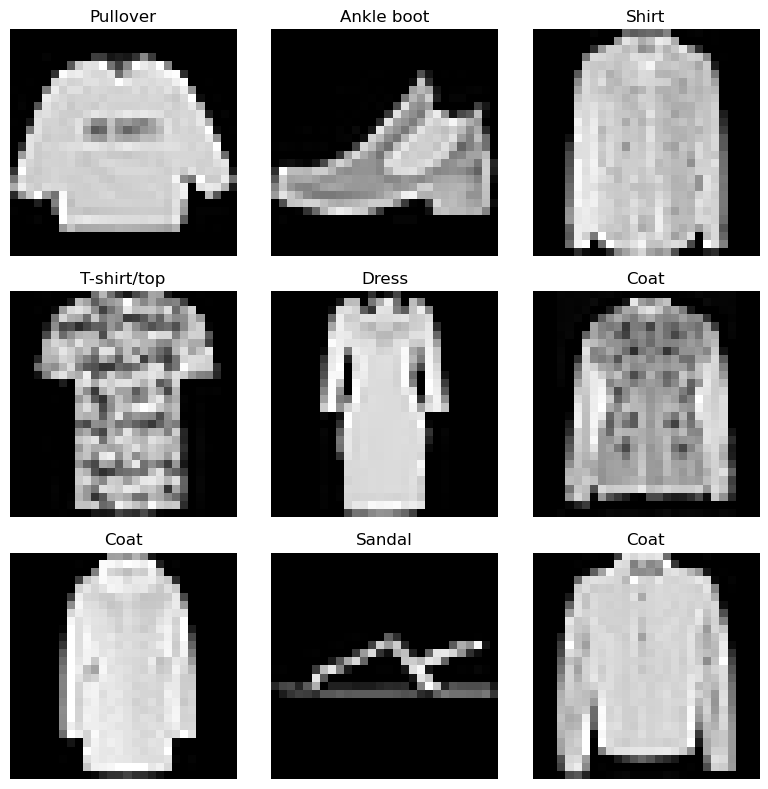

In [15]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train_img[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [16]:
# Flatten images to 784 for a simple dense model
X_train_flat = X_train_img.reshape(-1, 28 * 28)
X_test_flat  = X_test_img.reshape(-1, 28 * 28)

In [32]:
model = keras.Sequential([
    layers.Input(shape=(28 * 28,)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train_flat, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20
422/422 - 7s - 16ms/step - accuracy: 0.7893 - loss: 0.5904 - val_accuracy: 0.8450 - val_loss: 0.4326
Epoch 2/20
422/422 - 3s - 8ms/step - accuracy: 0.8491 - loss: 0.4171 - val_accuracy: 0.8603 - val_loss: 0.3859
Epoch 3/20
422/422 - 4s - 9ms/step - accuracy: 0.8614 - loss: 0.3783 - val_accuracy: 0.8722 - val_loss: 0.3555
Epoch 4/20
422/422 - 4s - 10ms/step - accuracy: 0.8704 - loss: 0.3525 - val_accuracy: 0.8747 - val_loss: 0.3487
Epoch 5/20
422/422 - 5s - 11ms/step - accuracy: 0.8768 - loss: 0.3360 - val_accuracy: 0.8793 - val_loss: 0.3328
Epoch 6/20
422/422 - 3s - 8ms/step - accuracy: 0.8813 - loss: 0.3221 - val_accuracy: 0.8783 - val_loss: 0.3389
Epoch 7/20
422/422 - 3s - 8ms/step - accuracy: 0.8833 - loss: 0.3160 - val_accuracy: 0.8840 - val_loss: 0.3250
Epoch 8/20
422/422 - 4s - 9ms/step - accuracy: 0.8861 - loss: 0.3026 - val_accuracy: 0.8853 - val_loss: 0.3203
Epoch 9/20
422/422 - 4s - 9ms/step - accuracy: 0.8909 - loss: 0.2920 - val_accuracy: 0.8853 - val_loss: 0.319

In [33]:
test_loss, test_acc = model.evaluate(X_test_flat, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss    : {test_loss:.4f}")

Test accuracy: 0.8950
Test loss    : 0.2911


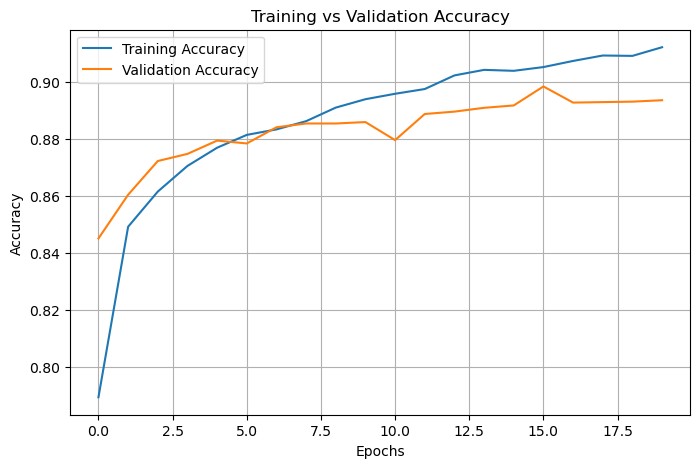

In [34]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

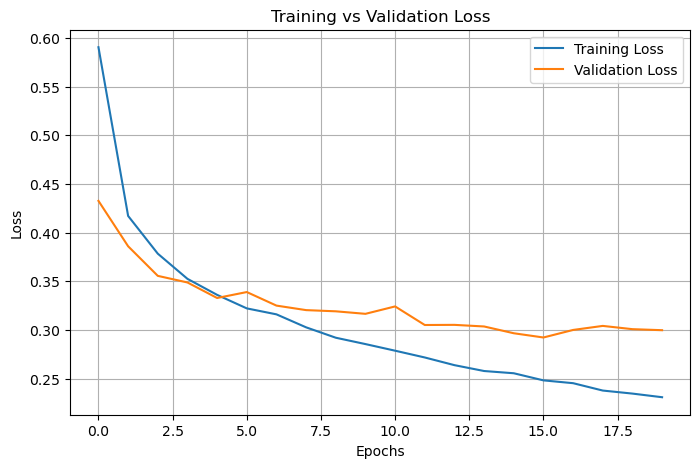

In [35]:
# Loss graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
pred_probs = model.predict(X_test_flat) 
pred_labels = np.argmax(pred_probs, axis=1)
result = pd.DataFrame({
    "Real": y_test, "Predicted": pred_labels
})
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


,Real,Predicted
0,0,0
1,1,1
2,2,2
3,2,2
4,3,4
...,...,...
9995,0,0
9996,6,6
9997,8,8
9998,8,8


In [44]:
from sklearn.metrics import accuracy_score, precision_score, classification_report
print("Accuracy Score:", accuracy_score(y_test, pred_labels))
print("Precision Score:", precision_score(y_test, pred_labels, average= 'weighted'))
print("Classifiaction Report", classification_report(y_test, pred_labels))

Accuracy Score: 0.895
Precision Score: 0.8941908943955299
Classifiaction Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.87      0.93      0.90      1000
           4       0.81      0.88      0.85      1000
           5       0.98      0.95      0.97      1000
           6       0.77      0.67      0.71      1000
           7       0.95      0.93      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.89      0.90      0.89     10000
weighted avg       0.89      0.90      0.89     10000



In [45]:
model.save("fashion_mnist_model.keras")   # or "fashion_mnist_model.h5"
print("Model saved!")

Model saved!
